In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

df = sns.load_dataset('titanic')

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]

df.dropna(inplace=True)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})

X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]


In [4]:
accuracy = accuracy_score(y_test, y_pred)
y_train_pred = log_reg.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Accuracy_train:{accuracy_train:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.76
Accuracy_train:0.82
Confusion Matrix:
 [[101  25]
 [ 27  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       126
           1       0.71      0.70      0.70        89

    accuracy                           0.76       215
   macro avg       0.75      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



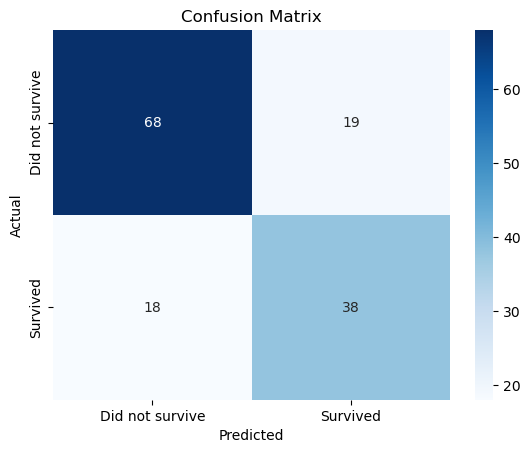

In [12]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


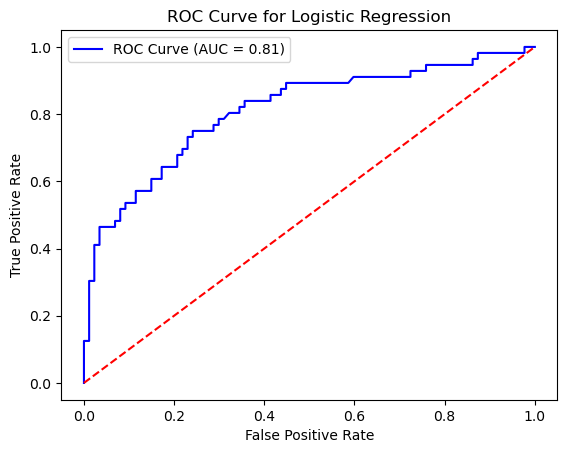

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


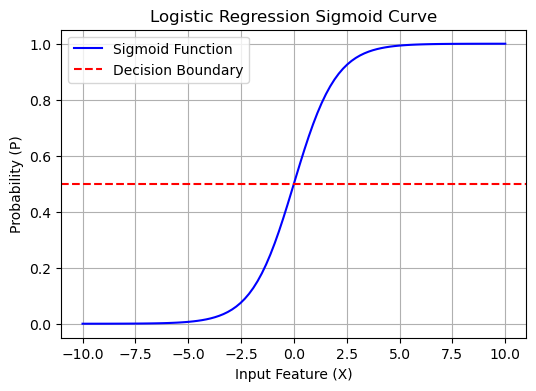

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  

X = np.linspace(-10, 10, 100)
y = expit(X) 

# Plot sigmoid curve
plt.figure(figsize=(6, 4))
plt.plot(X, y, label="Sigmoid Function", color='blue')
plt.axhline(0.5, color='red', linestyle='--', label="Decision Boundary")
plt.xlabel("Input Feature (X)")
plt.ylabel("Probability (P)")
plt.title("Logistic Regression Sigmoid Curve")
plt.legend()
plt.grid()
plt.show()
